# The effects of level of income on loans
## by Oluwatosin Olajide

## Investigation Overview

The overall goal is to show how the people with higher income stand to be the major benefactors of loans. I will 
- show that rich people tend to pay their loans.
- show that the lenders recognize that the rich would most likely pay their loans
- show that lender offer lower cost of loans to the rich
- show that the rich takes this loans


## Dataset Overview

Our data consists of 77376 thousand data points which include columns like 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'EstimatedLoss', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)','CreditScoreRangeLower' 'OpenCreditLines''AvailableBankcardCredit', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome', 'TotalProsperLoans', etc

In [23]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [24]:
# load in the dataset into a pandas dataframe
data = pd.read_csv("processed.csv")

## Rich People tend to pay their loans. ...

Since the rich people have enough money on at their disposal or at least a large monthly/yearly income, it is easier for them to pay their monthly debt installments. This is unlike their poor counterparts who are not as privileged as they are. 

Notice the decreasing percent of ChargedOff and Defaulted loans as we go higher in the income levels.

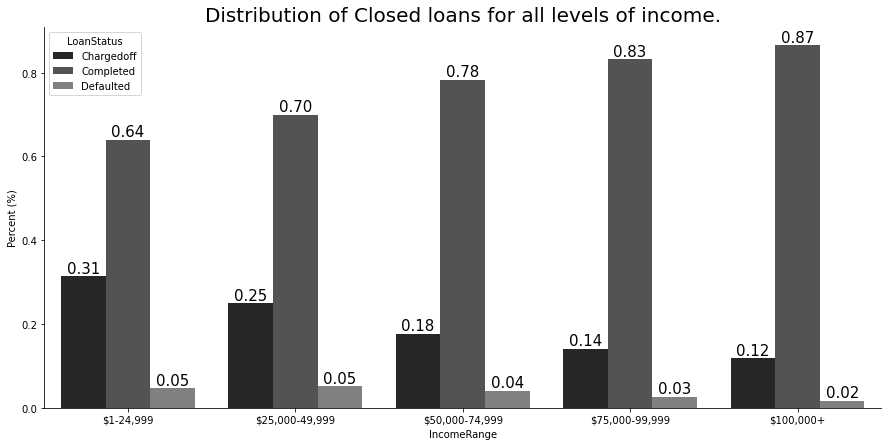

In [25]:
temp_df = data.query("~ClosedDate.isna()").groupby(["IncomeRange","LoanStatus"],as_index=False)["BorrowerAPR"].count()
temp_df.BorrowerAPR = temp_df.BorrowerAPR/temp_df.groupby("IncomeRange",as_index=False)["BorrowerAPR"].transform("sum")["BorrowerAPR"]
temp_df.rename(columns={"BorrowerAPR":"percent"},inplace=True)


plt.figure(figsize=(15,7))
ax = sns.barplot(x="IncomeRange",y="percent",data=temp_df,hue="LoanStatus",order=['$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999' , '$100,000+'], palette="dark:grey")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2,bar.get_height()),
        ha='center',
        va='center',
        size=15, 
        xytext=(0, 8),
        textcoords='offset points'
    )
ax.set_ylabel("Percent (%)")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Distribution of Closed loans for all levels of income.",fontsize=20);

## ... The lenders know this ...

The lenders (or at least their machine learning models) has also gotten a sense of this trend and are well aware of the risk that lending to poor people bring. Their body language (HR Ratings) shows this.

Notice how the graph moves from being right skewed to left skewed as we go higher the income levels

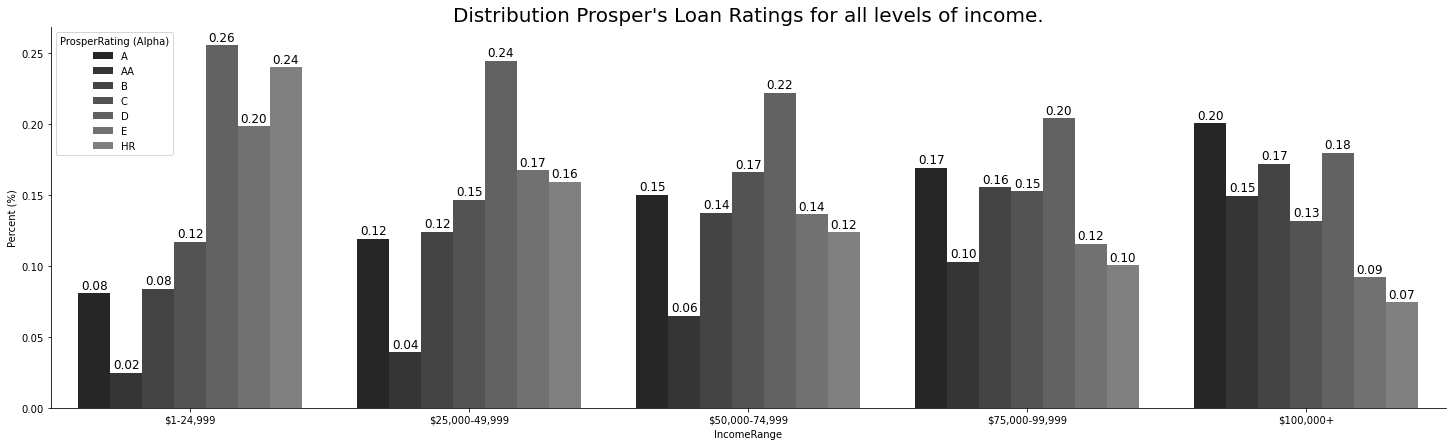

In [31]:
temp_df = data.query("~ClosedDate.isna()").groupby(["IncomeRange","ProsperRating (Alpha)"],as_index=False)["BorrowerAPR"].count()
temp_df.BorrowerAPR = temp_df.BorrowerAPR/temp_df.groupby("IncomeRange",as_index=False)["BorrowerAPR"].transform("sum")["BorrowerAPR"]
temp_df.rename(columns={"BorrowerAPR":"percent"},inplace=True)

#plot data
plt.figure(figsize=(25,7))
ax = sns.barplot(x="IncomeRange",y="percent",data=temp_df,hue="ProsperRating (Alpha)",order=['$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999' , '$100,000+'],palette="dark:grey")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2,bar.get_height()),
        ha='center',
        va='center',
        size=12, 
        xytext=(0, 8),
        textcoords='offset points'
    )
ax.set_ylabel("Percent (%)")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Distribution Prosper's Loan Ratings for all levels of income.",fontsize=20);

## And they offer the richer people cheaper loans

Because the rich is a more ideal customer for the lenders, they took a smart route by offering the rich loans with lower cost that their counterparts, the poor. This way they attract the ideal customers. 

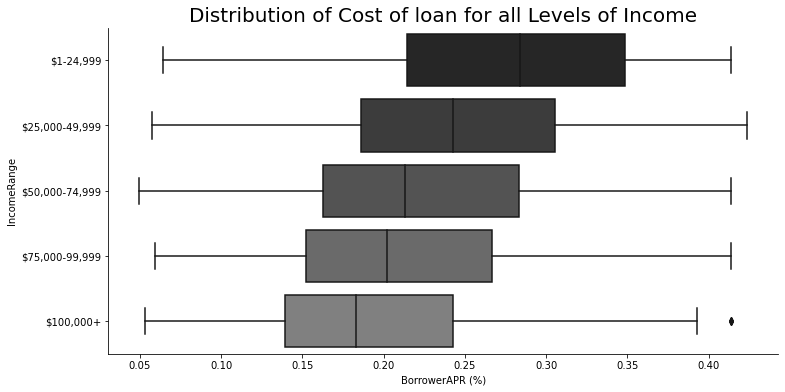

In [26]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="BorrowerAPR",y="IncomeRange",data=data,order=['$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999' , '$100,000+'], palette="dark:grey")
ax.set_xlabel("BorrowerAPR (%)")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Distribution of Cost of loan for all Levels of Income",fontsize=20);

## The rich takes advantage of this.

The rich definitely doesn't take this opportunity for granted and they try to utilize every single bit of the benefits. Just as Robert Kiyosaki says, the rich utilizes other people's money to get rich. Look at how the average number of open credit lines goes up as we go higher in the income levels.

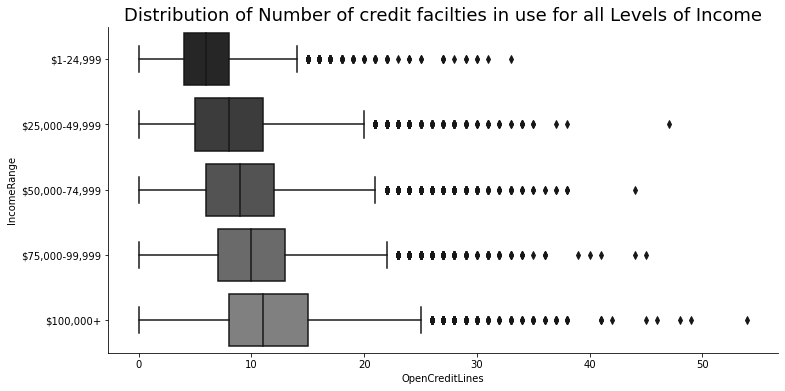

In [27]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="OpenCreditLines",y="IncomeRange",data=data,order=['$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999' , '$100,000+'],palette="dark:grey")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Distribution of Number of credit facilties in use for all Levels of Income",fontsize=18);

Not only in terms of number of loans.

But also size of loans.

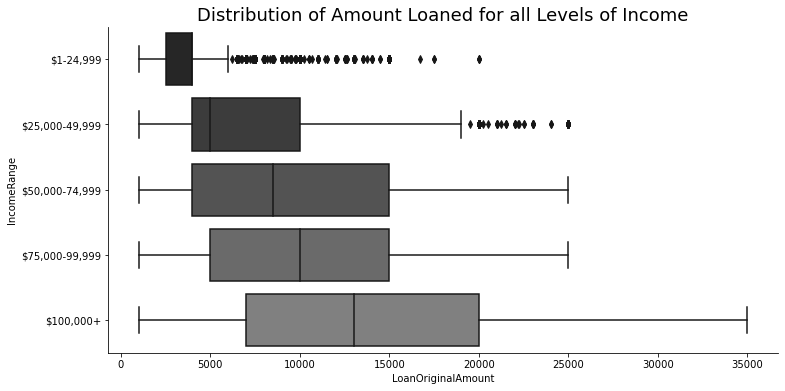

In [28]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="LoanOriginalAmount",y="IncomeRange",data=data,order=['$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999' , '$100,000+'],palette="dark:grey")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Distribution of Amount Loaned for all Levels of Income",fontsize=18);

## Conclusion

The  visualizations have clearly shown how the rich benefits from loans. While it may be considered unfair that the poor doesn't have access to the number and loan amount that the rich has access to, this is a disadvantage of the capitalist society we live. The lender are definitely not the business of charity.